In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wind_process import wind

In [2]:
T = 24
h = 1
n = T/h

kv = 0.1/h
kpi = 0.04/h

sig_v = 0.2
sig_pi = 0.075
sig_vpi = 0
sig_piv = 0.01

sigmav = lambda s: 8*(1 + 0.375*np.sin(np.pi/(12*h)*(s + 2/h)))
dsigmav = lambda s: 8*0.375*np.cos(np.pi/(12*h)*(s + 2/h))*(np.pi/(12*h))


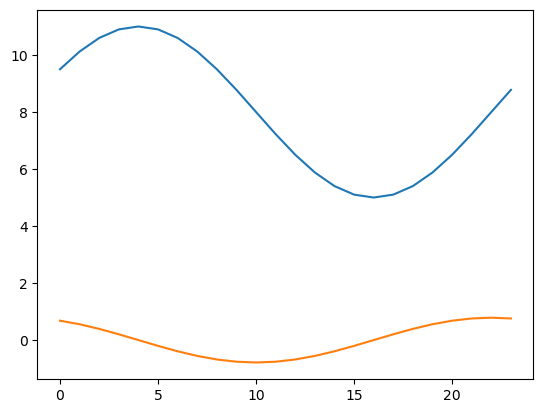

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, 24, h), sigmav(np.arange(0, 24, h)))
ax.plot(np.arange(0, 24, h), dsigmav(np.arange(0, 24, h)))
plt.show()

In [4]:
def wind_sde(T, h, kv, sig_v, sig_pi, sig_vpi, sig_piv):
    n = int(T/h)
    sigmav = lambda s: 8*(1 + 0.375*np.sin(np.pi/(12*h)*(s + 2/h)))
    dsigmav = lambda s: 8*0.375*np.cos(np.pi/(12*h)*(s + 2/h))*(np.pi/(12*h))
    cov = np.reshape(np.array([1, 0, 0, 1]), (2,2))
    brownianmotion = np.random.multivariate_normal([0,0], cov, size=n)
    s = 0
    v = np.zeros(n + 1)
    v[0] = np.random.normal(sigmav(0), 0.226)
    for i in range(0 + 1, n + 1):
        v[i] = v[i - 1] + kv*(sigmav(s) + 1/kv*dsigmav(s) - v[i - 1])*h + np.sqrt(h)*sig_v*v[i - 1]*brownianmotion[i - 1, 0] + np.sqrt(h)*sig_vpi*v[i - 1]*brownianmotion[i - 1, 1]
        s = s + h
    return v

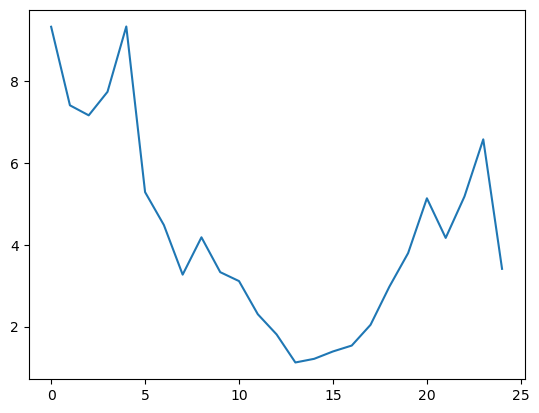

In [5]:
windspeed = wind_sde(T, h, kv, sig_v, sig_pi, sig_vpi, sig_piv)
fig, ax = plt.subplots()
ax.plot(np.arange(0, T + h, h), windspeed)
plt.show()

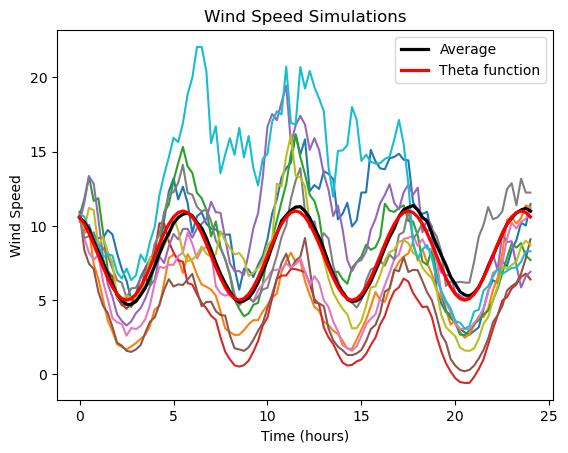

In [6]:
h = 0.25
sigmav = lambda s: 8*(1 + 0.375*np.sin(np.pi/(12*h)*(s + 2/h)))
simulations = 100

windmatrix = np.reshape(np.zeros(simulations*(int(T/h) + 1)), (simulations, (int(T/h) + 1)))
for i in range(simulations):
    windmatrix[i,] = wind_sde(T, h, kv, sig_v, sig_pi, sig_vpi, sig_piv)

meanmontecarlo = np.mean(windmatrix, axis = 0)

fig, ax = plt.subplots()
for i in range(10):
    ax.plot(np.arange(0, T + h, h), windmatrix[i])
ax.plot(np.arange(0, T + h, h), meanmontecarlo, label ="Average", linewidth=2.3, color = "black")
ax.plot(np.arange(0, T + h, h), sigmav(np.arange(0, T + h, h)), label ="Theta function", linewidth=2.3, color = "red")
ax.legend()
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Wind Speed")
ax.set_title("Wind Speed Simulations")
plt.show()


Questions:
How to incorporate covariance between speed and price?
Where does theta function come from and why does it depend on step size?

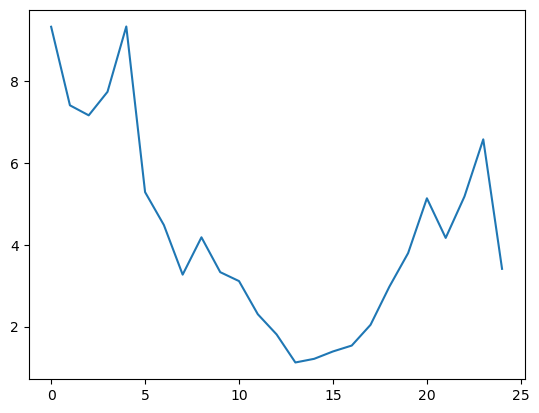

In [7]:
cov = np.reshape(np.array([1, 0, 0, 1]), (2,2))
BM = np.random.multivariate_normal([0,0], cov, size=int(n))
h = T/n
wind_speed = wind(kv, sig_v, sig_vpi,T, n = n)

fig, ax = plt.subplots()
ax.plot(np.arange(0, T + h, h), windspeed)
plt.show()

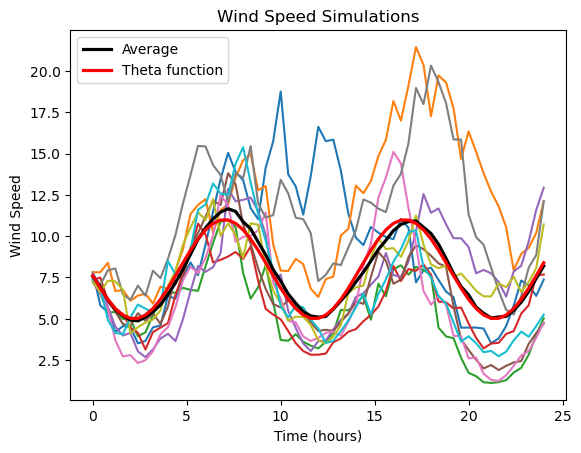

In [11]:

sigmav = lambda s: 8*(1 + 0.375*np.sin(np.pi/(12*h)*(s + 2/h)))
simulations = 100
n= 60
h = T/n

windmatrix = np.reshape(np.zeros(simulations*(int(T/h) + 1)), (simulations, (int(T/h) + 1)))
for i in range(simulations):
    windmatrix[i,] = wind(kv, sig_v, sig_vpi,T, n = n)

meanmontecarlo = np.mean(windmatrix, axis = 0)

fig, ax = plt.subplots()
for i in range(10):
    ax.plot(np.arange(0, T + h, h), windmatrix[i])
ax.plot(np.arange(0, T + h, h), meanmontecarlo, label ="Average", linewidth=2.3, color = "black")
ax.plot(np.arange(0, T + h, h), sigmav(np.arange(0, T + h, h)), label ="Theta function", linewidth=2.3, color = "red")
ax.legend()
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Wind Speed")
ax.set_title("Wind Speed Simulations")
plt.show()